## quantitative analysis for META


In [1]:
from load import load_data
from indicators import indicators
from indicators import summary
from q_plot import quantiattive
import pandas as pd
import yfinance as yf
import talib
import matplotlib.pyplot as plt

In [2]:
df=load_data(r'C:\Users\ASUS VIVO\Desktop\data\MSFT_historical_data.csv')

Prepare Your Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9672 non-null   object 
 1   Open          9672 non-null   float64
 2   High          9672 non-null   float64
 3   Low           9672 non-null   float64
 4   Close         9672 non-null   float64
 5   Adj Close     9672 non-null   float64
 6   Volume        9672 non-null   int64  
 7   Dividends     9672 non-null   float64
 8   Stock Splits  9672 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 680.2+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9672 non-null   datetime64[ns]
 1   Open          9672 non-null   float64       
 2   High          9672 non-null   float64       
 3   Low           9672 non-null   float64       
 4   Close         9672 non-null   float64       
 5   Adj Close     9672 non-null   float64       
 6   Volume        9672 non-null   int64         
 7   Dividends     9672 non-null   float64       
 8   Stock Splits  9672 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 680.2 KB


Calculate Basic Technical Indicators

In [6]:
indicators(data=df,open='Open',high='High',low='Low',close='Close')


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.984000,...,434.201963,472.994331,455.539001,438.083672,467.071484,447.938997,428.806509,471.879834,451.887498,431.895163
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.973999,...,430.532883,475.104037,454.349001,433.593964,469.681842,446.404997,423.128152,474.949525,450.199498,425.449471
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,449.275000,...,424.358564,476.481381,452.986501,429.491620,471.022399,444.679997,418.337596,475.799161,448.820497,421.841833
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,448.200499,...,422.201405,476.970562,451.825000,426.679438,471.315433,443.594498,415.873562,476.456626,447.809497,419.162368


summary for the data

In [7]:
summary(data=df)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,RSI_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
count,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9.672000e+03,9672.000000,9672.000000,9653.000000,9658.000000,...,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000
mean,58.402199,59.003071,57.784759,58.417683,52.719365,5.677678e+07,0.002982,0.001758,58.084215,53.606088,...,55.088125,61.582707,58.683265,55.783822,60.474445,57.471510,54.468575,61.135955,58.101983,55.068011
std,90.122302,90.958645,89.232546,90.146786,90.066461,3.814123e+07,0.046524,0.057944,89.347645,11.590073,...,85.098078,94.366003,90.184940,86.063113,92.818284,88.470684,84.188709,93.760215,89.380494,85.065859
min,0.088542,0.092014,0.088542,0.090278,0.055665,2.304000e+06,0.000000,0.000000,0.095746,15.730310,...,0.088263,0.103350,0.097830,0.088917,0.100595,0.094358,0.087759,0.101666,0.096180,0.088144
25%,5.695313,5.770508,5.617188,5.695313,3.511695,3.206982e+07,0.000000,0.000000,5.776953,45.531694,...,5.289988,6.273633,5.859961,5.412235,6.123682,5.691699,5.197123,6.204176,5.790967,5.282346
50%,27.304999,27.600000,27.085000,27.341875,19.145540,4.990225e+07,0.000000,0.000000,27.264500,53.783307,...,26.012265,28.924255,27.507000,26.319398,28.397442,27.024500,25.723854,28.714381,27.268500,25.964725
75%,46.687500,47.099998,46.138672,46.657187,38.339042,7.071788e+07,0.000000,0.000000,46.246500,61.814291,...,43.756128,49.300536,46.747000,44.298330,48.361621,45.732813,43.046152,48.970345,46.300000,43.609513
max,467.000000,468.350006,464.459991,467.559998,466.718781,1.031789e+09,3.080000,2.000000,453.876997,88.564233,...,440.690745,477.276636,457.401500,444.546288,472.133428,450.507498,438.042354,476.456626,454.443501,441.077183


In [8]:
column=summary(data=df).columns.tolist()
column

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'SMA_open',
 'RSI_open',
 'SMA_high',
 'RSI_high',
 'SMA_low',
 'RSI_low',
 'SMA_close',
 'RSI_close',
 'Upper_Band_open',
 'Middle_Band_open',
 'Lower_Band_open',
 'Upper_Band_high',
 'Middle_Band_high',
 'Lower_Band_high',
 'Upper_Band_low',
 'Middle_Band_low',
 'Lower_Band_low',
 'Upper_Band_close',
 'Middle_Band_close',
 'Lower_Band_close']

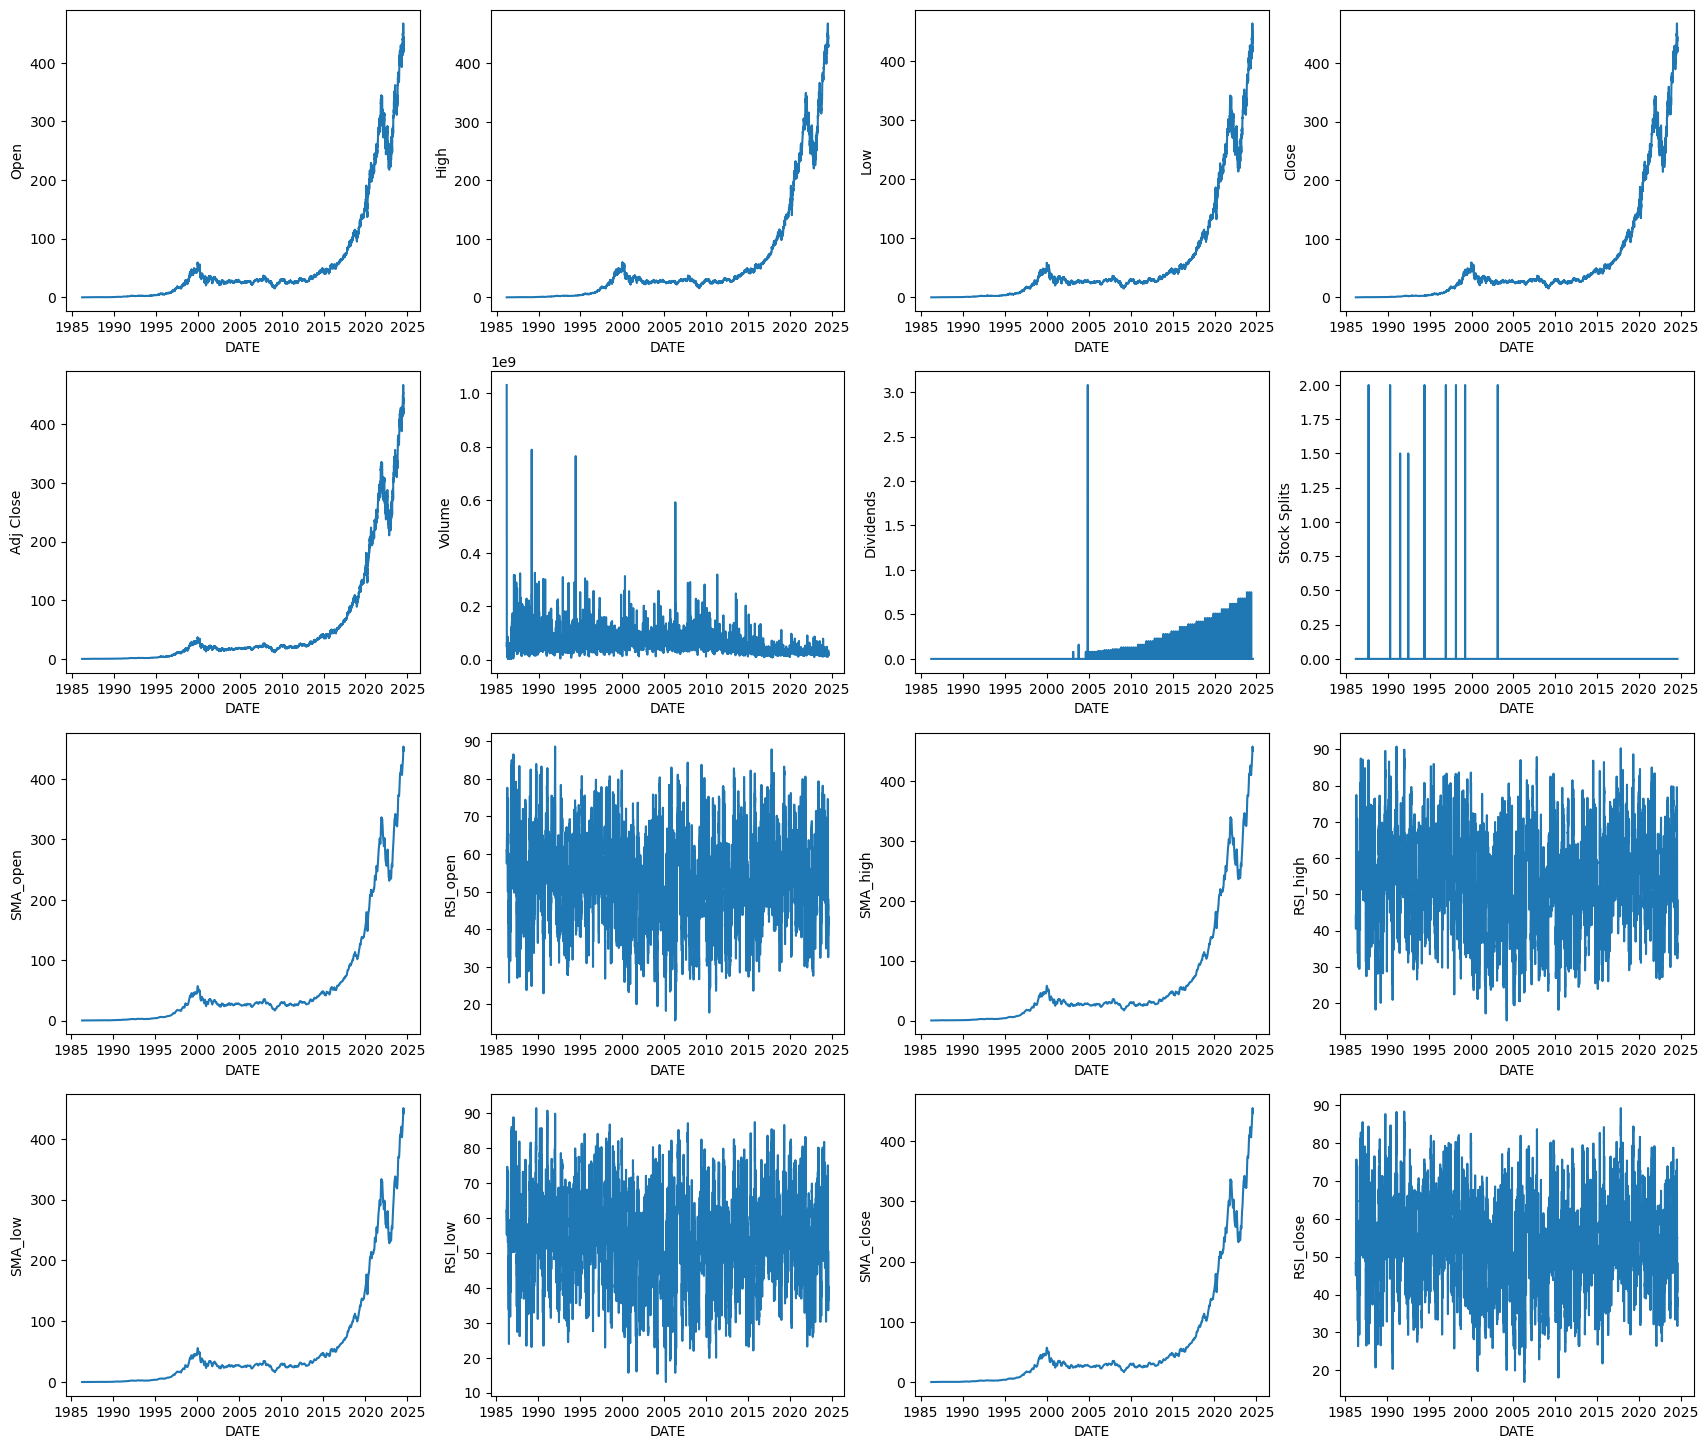

In [9]:
quantiattive(data=df,column=column)